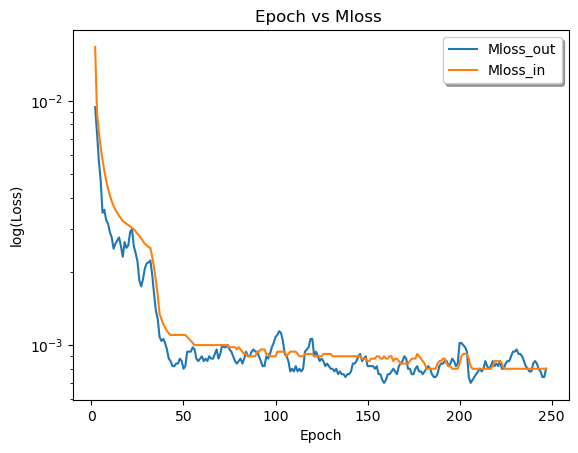

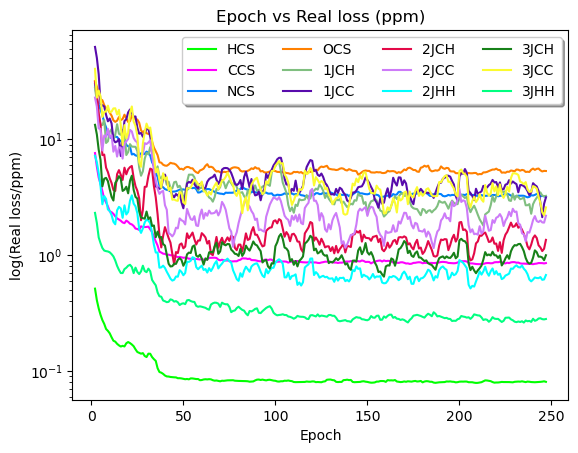

'\npickles = glob.glob(f\'./{percentage_incorp}Pred/*.pkl\')\n\ndf = pd.read_pickle(str(pickles))\nmae = (df.iloc[:, -1] - df.iloc[:, -2]).abs().mean()\nrmse = np.sqrt(((df.iloc[:, -1] - df.iloc[:, -2]) ** 2).mean())\nprint(f"Mean Absolute Error: {mae}")\nprint(f"Root Mean Square Error: {rmse}")\n'

In [2]:
import IPython
import csv
from IPython.display import display
import distinctipy 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import glob

percentage_incorp ='100'
Other_columns=[]
columns_after_first=[]
column_titles=[]
rows_first=[]
other_data=[]
rows = []
Cleared_list = []
# read the text file
with open(f'IMP2_{percentage_incorp}Enhance_refined_NOD_iter_log.txt', 'r') as file:
    lines = file.readlines()

# extract the column names from the first row
column_names = lines[0].split('|')
for x in column_names:
    if x == 'Epoch     	Mloss_in  	Mloss_out 	Time      ':
        Mloss_names = x.split('\t')
        for x in Mloss_names:
            y=x.replace(' ','')
            column_titles.append(y)
    else:
        y=x.replace('\tML', 'ML\t')
        variable = y.split('\t')
        for last_one in variable:
            y=last_one.replace('\n', '')
            z=y.replace(' ','')
            Other_columns.append(z)
        Cleared_list = list(filter(None, Other_columns))
columns = column_titles + Cleared_list

data_rows=[]
for line in lines[1:]:
    data = line.split('|')
    del data[-1]
    for x in data:
        if x == data[0]:
            Mloss_data = x.split('\t')
            stripping_01 = [s.strip() for s in Mloss_data]
            floating= [float(s) for s in stripping_01]
            rows_first.append(floating)
        else:
            y=x.replace('\t','')
            variable = y.replace('     ','   ')
            variable = variable.replace('\n','')
            split = variable.split('   ')
            floating= [float(s) for s in split]
            other_data.append(floating)
    Cleared_list = list(filter(None, other_data))
    rows = rows_first + Cleared_list
    flat_rows = [item for sublist in rows for item in sublist]
    data_rows.append(flat_rows)
    rows_first=[]
    other_data=[]
sublist = []
flat_list = []

df = pd.DataFrame(data_rows, columns=columns)
diff_df=pd.DataFrame()
#df.to_csv(f'dfoutput{percentage_incorp}_epocs.csv')

array=np.arange(28)
colours = distinctipy.get_colors(28)
for x in array:
    if x == 1:
        #diff_df[x] = df.iloc[:,int(x)] - df.iloc[:,int(x)+1]
        #abso=diff_df[x].abs()
        average_data_out = df['Mloss_out'].rolling(window=5, center=True).mean()
        average_data_in = df['Mloss_in'].rolling(window=5, center=True).mean()

        Mloss = plt.subplot()
        Mloss.plot(df['Epoch'], average_data_out, label=df.columns[x+1])
        Mloss.plot(df['Epoch'], average_data_in, label=df.columns[x])
        plt.yscale('log')
        plt.xlabel('Epoch')
        plt.ylabel('log(Loss)')
        plt.title('Epoch vs Mloss ')
        Mloss.legend(fancybox=True, shadow=True)
        plt.show()
        #plt.savefig(f'{percentage_incorp}Mloss_with_Epocs.png', dpi =300, bbox_inches='tight')
        continue
    if (x % 2) == 0:
        continue
    if x==3:
        continue
    else:
        #diff_df[x] = df.iloc[:,int(x)]
        #abso=diff_df[x].abs()
        namelong = df.columns[x]
        name = namelong.replace('RL', '')
        average_data = df[namelong].rolling(window=5, center=True).mean()
        plt.plot(df['Epoch'], average_data, label=name, color=colours[((x-1)//2)-2])         
#Note RL is real loss, mL is machine lost (which is normalised), so just use RL
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('log(Real loss/ppm)')
plt.title('Epoch vs Real loss (ppm)')
plt.legend(ncol=4, fancybox=True, shadow=True)
#plt.xlim(xmin=50)
plt.show()
#plt.savefig(f'{percentage_incorp}Other_variables_with_Epocs.png', dpi=300, bbox_inches='tight')

"""
pickles = glob.glob(f'./{percentage_incorp}Pred/*.pkl')

df = pd.read_pickle(str(pickles))
mae = (df.iloc[:, -1] - df.iloc[:, -2]).abs().mean()
rmse = np.sqrt(((df.iloc[:, -1] - df.iloc[:, -2]) ** 2).mean())
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")
"""

In [ ]:
import numpy as np
import pandas as pd

df_test_atom = pd.read_pickle('../Data/Pickles/100Enhance_test_atoms.pkl')
df_train_atom = pd.read_pickle('../Data/Pickles/100Enhance_train_atoms.pkl')
df_extra_atom = pd.read_pickle('../Data/Pickles/extra_atoms.pkl')
df_extra_atom['molecule_name'] = df_extra_atom['molecule_name'].apply(lambda x: 'CHEMBL' + str(x))

df = pd.concat([df_train_atom, df_test_atom, df_extra_atom], ignore_index=True)

shift_molecule_name_list = []
df_filtered_C = df[(df['typeint'] == 6)]
df_filtered_C_only = df_filtered_C[df_filtered_C['shift'] != 183.64220633]

for index, row in df_filtered_C[df_filtered_C['shift'] == 183.64220633].iterrows():
    shift_molecule_name_list.append(row['molecule_name'])

df = pd.concat([df_train_atom, df_test_atom, df_extra_atom], ignore_index=True)

#filter to only the first atom in each molecule
filtered_df = df[df['atom_index'] == 0]
molecule_names = filtered_df['molecule_name'].tolist()

# Finding the names that appear more than once
duplicates = set([x for x in molecule_names if molecule_names.count(x) > 1])

df = pd.concat([df_train_atom, df_test_atom, df_extra_atom], ignore_index=True)
valid_values = {1, 6, 7, 8, 9, 14, 15, 16, 17, 35}
invalid_atoms = set()

for index, row in df.iterrows():
    if row['typeint'] not in valid_values:
        invalid_atoms.add(row['molecule_name'])
print(f'contains duplicates, #{len(duplicates)}')
print(f'contains invalid shifts (check NMREDATA.SDF file), #{len(set(shift_molecule_name_list))}')
print(f'contains invalid atoms, #{len(invalid_atoms)}')
dodgy_molecules = molecule_name_list = duplicates|set(shift_molecule_name_list)|invalid_atoms

df_test_atom = pd.read_pickle('../Data/Pickles/100Enhance_test_atoms.pkl')
df_train_atom = pd.read_pickle('../Data/Pickles/100Enhance_train_atoms.pkl')
df_test_pairs = pd.read_pickle('../Data/Pickles/100Enhance_test_pairs.pkl')
df_train_pairs = pd.read_pickle('../Data/Pickles/100Enhance_train_pairs.pkl')
df_test_atom_dropped_invalid_mols = df_test_atom[~df_test_atom['molecule_name'].isin(dodgy_molecules)]
df_train_atom_dropped_invalid_mols = df_train_atom[~df_train_atom['molecule_name'].isin(dodgy_molecules)]
df_test_pairs_dropped_invalid_mols = df_test_pairs[~df_test_pairs['molecule_name'].isin(dodgy_molecules)]
df_train_pairs_dropped_invalid_mols = df_train_pairs[~df_train_pairs['molecule_name'].isin(dodgy_molecules)]
pd.to_pickle(df_test_atom_dropped_invalid_mols, '../Data/Pickles/Pickle_filter/100_test_atom_filter.pkl')
pd.to_pickle(df_train_atom_dropped_invalid_mols, '../Data/Pickles/Pickle_filter/100_train_atom_filter.pkl')
pd.to_pickle(df_test_pairs_dropped_invalid_mols, '../Data/Pickles/Pickle_filter/100_test_pairs_filter.pkl')
pd.to_pickle(df_train_pairs_dropped_invalid_mols, '../Data/Pickles/Pickle_filter/100_train_pairs_filter.pkl')


contains duplicates, #3
contains invalid shifts (check NMREDATA.SDF file), #30
contains invalid atoms, #2


In [ ]:
import sklearn
import sys
import pandas as pd
import numpy as np
import rdkit
percentage_incorp = 100

from sklearn.metrics import mean_squared_error, mean_absolute_error
df_2 = pd.read_pickle(f'./{percentage_incorp}Pred/testset_atom_df.pkl')
df_1 = pd.read_pickle(f'./{percentage_incorp}Pred/extra_with_shift.pkl')

df_1.rename(columns={'mol_id': 'molecule_name', 'atom_type': 'type_int'}, inplace=True)

df_concatenated = pd.concat([df_1, df_2])
df_concatenated['molecule_name']=df_concatenated['molecule_name'].astype(str)

df_concatenated.reset_index(drop=True, inplace=True)
df = df_concatenated


rmse_list =[]
error_list=[]
Crmse_list=[]
Cmae_list=[]
previous_molecule_passed = (df['molecule_name'].iloc[0])
passing_error_for_molecule = []
dodgey_index = []
for x in dodgy_molecules:
    index= (df[df['molecule_name']==x].index.values)
    index = index.tolist()
    dodgey_index.append(index)
dodgey_flat_list = [item for sublist in dodgey_index for item in sublist]
set_dodgey_flat = set(dodgey_flat_list)
df.drop(index=set_dodgey_flat, inplace=True)


df_filtered_H = df[(df['typeint'] == 1)]
shifts = []
predicted_shifts = []
tuple_list = []
for x, y, z in zip(df_filtered_H['molecule_name'], df_filtered_H['shift'], df_filtered_H['predicted_shift']):
    if str(x) == str(previous_molecule_passed):
        previous_molecule_passed = x
        shifts.append(y)
        predicted_shifts.append(z)
    else:
        rmse = np.sqrt(mean_squared_error(shifts, predicted_shifts))
        mae = mean_absolute_error(shifts, predicted_shifts)
        tuple_create = (previous_molecule_passed, rmse, mae)
        tuple_list.append(tuple_create)
        shifts = []
        predicted_shifts = []
        shifts.append(y)
        predicted_shifts.append(z)
        previous_molecule_passed = x
df_for_errors_in_mols_H = pd.DataFrame(tuple_list, columns=['molecule_name', '1H RMSE', '1H MAE'])

#df_for_errors_in_mols_H.to_csv('./1H molecules error/1H Molecules error extra atoms'+str(percentage_incorp)+' retry 2.csv')

shifts = []
predicted_shifts = []
previous_molecule_passed = (df['molecule_name'].iloc[0])
passing_error_for_molecule = []
tuple_listC = []

df_filtered_C = df[(df['typeint'] == 6)]
for x, y, z in zip(df_filtered_C['molecule_name'], df_filtered_C['shift'], df_filtered_C['predicted_shift']):
    if str(x) == str(previous_molecule_passed):
        previous_molecule_passed = x
        shifts.append(y)
        predicted_shifts.append(z)
    else:
        rmse = np.sqrt(mean_squared_error(shifts, predicted_shifts))
        mae = mean_absolute_error(shifts, predicted_shifts)
        tuple_create = (previous_molecule_passed, rmse, mae)
        tuple_listC.append(tuple_create)
        shifts = []
        predicted_shifts = []
        shifts.append(y)
        predicted_shifts.append(z)
        previous_molecule_passed = x
df_for_errors_in_mols_C = pd.DataFrame(tuple_listC, columns=['molecule_name', '13C RMSE', '13C MAE'])
#df_for_errors_in_mols_C.to_csv('./13C molecules error/13C Molecules error extra atoms'+str(percentage_incorp)+' retry 2.csv')


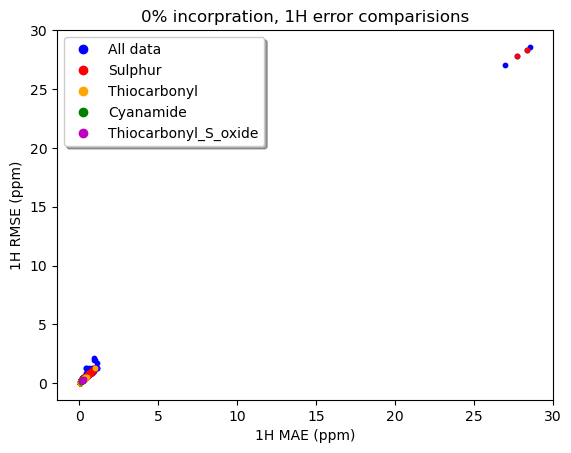

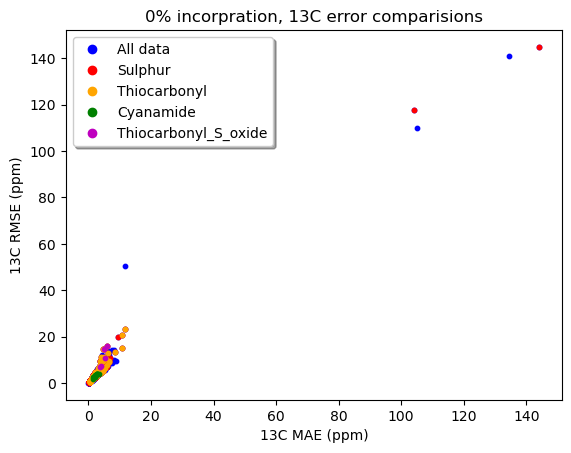

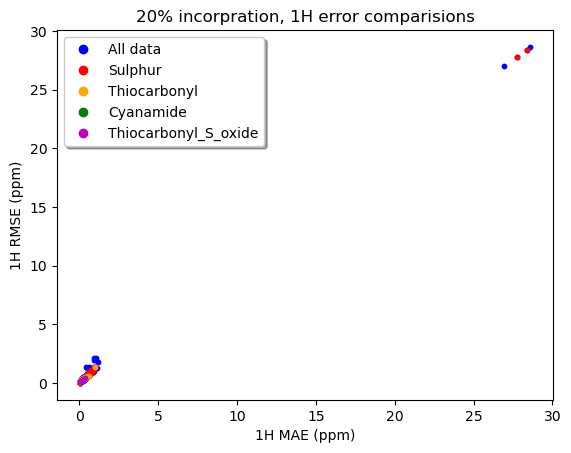

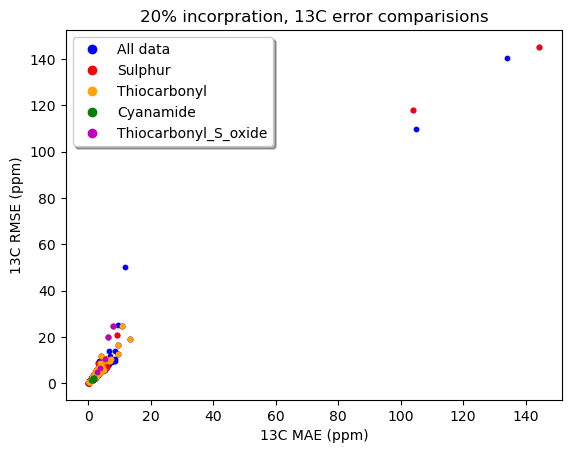

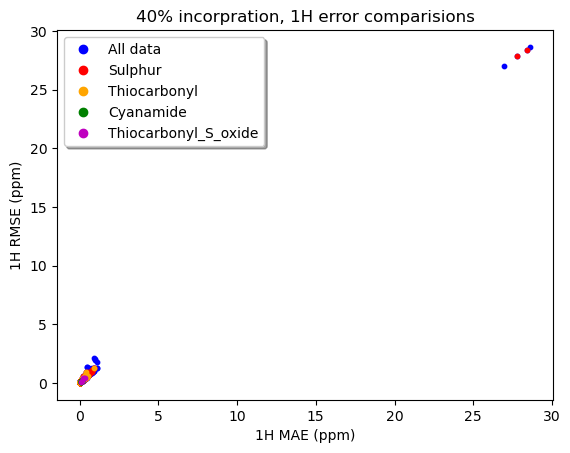

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from statistics import mean
fig, axs = plt.subplots()
percentage_incorp = ['0', '20', '40', '60', '80', '100']
isotopes = ['1H', '13C']
functional_groups = ['S', 'thio', 'cyano', 'thio-oxide']
list_to_fill =[]

#Empty_fields
Isotope = []
All_RMSE =[]
All_MAE =[]
Sulphur_RMSE =[]
Sulphur_MAE=[]
Thiocarbonyl_RMSE=[]
Thiocarbonyl_MAE=[]
Cyanamide_RMSE=[]
Cyanamide_MAE=[]
thio_oxide_RMSE = []
thio_oxide_MAE=[]
tuple_list =[]
size=10
for percentage in percentage_incorp:
    for isotope in isotopes:
        molecules_all_rmse = []
        molecules_all_mae = []
        data = pd.read_csv(f'./{isotope} molecules error/{isotope} Molecules error extra atoms{percentage} no filter.csv')
        rmse = data[f'{isotope} RMSE']
        mae = data[f'{isotope} MAE']
        Isotope = isotope
        for count, x in enumerate(data['molecule_name']):
            molecules_all_rmse.append(rmse[count])
            molecules_all_mae.append(mae[count])
            plt.scatter(mae[count], rmse[count], s=size, color = 'b')
        All_RMSE = mean(molecules_all_rmse)
        All_MAE = mean(molecules_all_mae)
        for function_group in functional_groups:
            with open(f'../Data/cleaned_datasets/{function_group}_all_mols_with.txt', 'r') as file:
                lst2 = [p.strip() for p in file.read().split(',')]
            with open(f'../cleaned_testing_dataset/DFT8K/{function_group}DFT8Kmatches.txt', 'r') as file1:
                lst1 = [p.strip() for p in file1.read().split('\n')]
            lst=lst2+lst1
            
            molecules_with_func_group_rmse = [] 
            molecules_with_func_group_mae = []        
            plt.xlabel(f'{isotope} MAE (ppm)')
            plt.ylabel(f'{isotope} RMSE (ppm)')
            plt.title(f'{percentage}% incorpration, {isotope} error comparisions')
            for count, x in enumerate(data['molecule_name']):
                if x in set(lst):
                    molecules_with_func_group_rmse.append(rmse[count])
                    molecules_with_func_group_mae.append(mae[count])
                    if function_group == 'S':
                        plt.scatter(mae[count], rmse[count], s=size, color = 'r')
                    if function_group == 'cyano':
                        plt.scatter(mae[count], rmse[count], s=size, color = 'g')
                    if function_group == 'thio':
                        plt.scatter(mae[count], rmse[count], s=size, color = 'orange')
                    if function_group == 'thio-oxide':
                        plt.scatter(mae[count], rmse[count], s=size, color = 'm')
                if x not in set(lst):
                    continue

            if (len(molecules_with_func_group_mae) == 0):
                if function_group == 'S':
                        Sulphur_RMSE = 0
                        Sulphur_MAE = 0
                if function_group == 'cyano':
                        Cyanamide_RMSE = 0
                        Cyanamide_MAE = 0
                if function_group == 'thio':
                        Thiocarbonyl_RMSE = 0
                        Thiocarbonyl_MAE = 0
                if function_group == 'thio-oxide':
                    Thiooxide_RMSE = 0
                    Thiooxide_MAE = 0
            else:
                if function_group == 'S':
                        Sulphur_RMSE = mean(molecules_with_func_group_rmse)
                        Sulphur_MAE = mean(molecules_with_func_group_mae)
                if function_group == 'cyano':
                        Cyanamide_RMSE = mean(molecules_with_func_group_rmse)
                        Cyanamide_MAE = mean(molecules_with_func_group_mae)
                if function_group == 'thio':
                        Thiocarbonyl_RMSE = mean(molecules_with_func_group_rmse)
                        Thiocarbonyl_MAE = mean(molecules_with_func_group_mae)
                if function_group == 'thio-oxide':
                    thio_oxide_RMSE = mean(molecules_with_func_group_rmse)
                    thio_oxide_MAE = mean(molecules_with_func_group_mae)
        All_leg=mlines.Line2D([], [], color='b', marker='o', ls='', label='All data')
        Sulphur_leg=mlines.Line2D([], [], color='r', marker='o', ls='', label='Sulphur')
        Thio_leg = mlines.Line2D([], [], color='orange', marker ='o', ls='', label='Thiocarbonyl')
        Cyano_leg = mlines.Line2D([], [], color='g', marker='o', ls='', label='Cyanamide')
        Thio_oxide_leg=mlines.Line2D([], [], color='m', marker ='o', ls='', label='Thiocarbonyl_S_oxide')
        plt.legend(handles=[All_leg, Sulphur_leg, Thio_leg, Cyano_leg, Thio_oxide_leg], loc='upper left', fancybox=True, shadow=True)
        plt.show()
        tuple_create = (percentage, Isotope, All_MAE, All_RMSE, Sulphur_MAE, Sulphur_RMSE, Thiocarbonyl_MAE, Thiocarbonyl_RMSE, Cyanamide_MAE, Cyanamide_RMSE)#, thio_oxide_MAE, thio_oxide_RMSE)
        tuple_list.append(tuple_create)

df_errors_with_groups = pd.DataFrame(tuple_list, columns=['percentage_incorp', 'Isotope', 'All_MAE','All_RMSE', 'Sulphur_MAE', 'Sulphur_RMSE', 'Thiocarbonyl_MAE', 'Thiocarbonyl_RMSE', 'Cyanamide_MAE', 'Cyanamide_RMSE'])#, 'Thio_oxide_MAE', 'Thio_oxide_RMSE'])
display(df_errors_with_groups)


In [ ]:
df_errors_with_groups.to_csv('./Errors_Reorderred.csv')

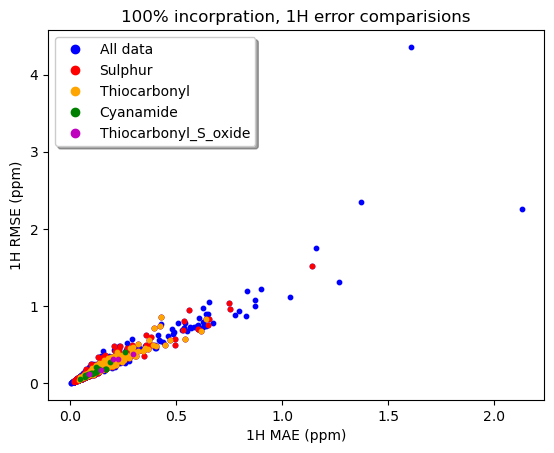

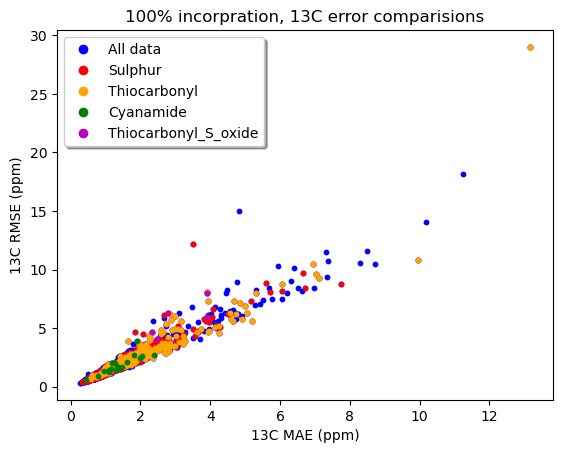

,percentage_incorp,Isotope,All_MAE,All_RMSE,Sulphur_MAE,Sulphur_RMSE,Thiocarbonyl_MAE,Thiocarbonyl_RMSE,Cyanamide_MAE,Cyanamide_RMSE,Thio_oxide_MAE,Thio_oxide_RMSE
0,100,1H,0.085894,0.117152,0.092824,0.127425,0.167555,0.231199,0.122808,0.161797,0.191063,0.261042
1,100,13C,1.136416,1.479965,1.238555,1.637547,2.164239,3.030985,1.393564,1.862318,3.077601,5.806489


In [ ]:
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from statistics import mean
fig, axs = plt.subplots()
percentage_incorp = ['100']
isotopes = ['1H', '13C']
functional_groups = ['S', 'thio', 'cyano', 'thio-oxide']
list_to_fill =[]

#Empty_fields
Isotope = []
All_RMSE =[]
All_MAE =[]
Sulphur_RMSE =[]
Sulphur_MAE=[]
Thiocarbonyl_RMSE=[]
Thiocarbonyl_MAE=[]
Cyanamide_RMSE=[]
Cyanamide_MAE=[]
thio_oxide_RMSE = []
thio_oxide_MAE=[]
tuple_list =[]
size=10
for perentage in percentage_incorp:
    for isotope in isotopes:
        molecules_all_rmse = []
        molecules_all_mae = []
        data = pd.read_csv(f'./{isotope} molecules error/{isotope} Molecules error extra atoms{perentage} no_test_errors.csv')
        
        rmse = data[f'{isotope} RMSE']
        mae = data[f'{isotope} MAE']
        Isotope = isotope
        for count, x in enumerate(data['molecule_name']):
            molecules_all_rmse.append(rmse[count])
            molecules_all_mae.append(mae[count])
            plt.scatter(mae[count], rmse[count], s=size, color = 'b')
        All_RMSE = mean(molecules_all_rmse)
        All_MAE = mean(molecules_all_mae)
        for function_group in functional_groups:
            with open(f'../Data/cleaned_datasets/{function_group}_all_mols_with.txt', 'r') as file:
                lst2 = [p.strip() for p in file.read().split(',')]
            with open(f'../cleaned_testing_dataset/DFT8K/{function_group}DFT8Kmatches.txt', 'r') as file1:
                lst1 = [p.strip() for p in file1.read().split('\n')]
            lst=lst2+lst1
            
            molecules_with_func_group_rmse = [] 
            molecules_with_func_group_mae = []        
            plt.xlabel(f'{isotope} MAE (ppm)')
            plt.ylabel(f'{isotope} RMSE (ppm)')
            plt.title(f'{perentage}% incorpration, {isotope} error comparisions')
            for count, x in enumerate(data['molecule_name']):
                if x in set(lst):
                    molecules_with_func_group_rmse.append(rmse[count])
                    molecules_with_func_group_mae.append(mae[count])
                    if function_group == 'S':
                        plt.scatter(mae[count], rmse[count], s=size, color = 'r')
                    if function_group == 'cyano':
                        plt.scatter(mae[count], rmse[count], s=size, color = 'g')
                    if function_group == 'thio':
                        plt.scatter(mae[count], rmse[count], s=size, color = 'orange')
                    if function_group == 'thio-oxide':
                        plt.scatter(mae[count], rmse[count], s=size, color = 'm')
                if x not in set(lst):
                    continue

            if (len(molecules_with_func_group_mae) == 0):
                if function_group == 'S':
                        Sulphur_RMSE = 0
                        Sulphur_MAE = 0
                if function_group == 'cyano':
                        Cyanamide_RMSE = 0
                        Cyanamide_MAE = 0
                if function_group == 'thio':
                        Thiocarbonyl_RMSE = 0
                        Thiocarbonyl_MAE = 0
                if function_group == 'thio-oxide':
                    Thiooxide_RMSE = 0
                    Thiooxide_MAE = 0
            else:
                if function_group == 'S':
                        Sulphur_RMSE = mean(molecules_with_func_group_rmse)
                        Sulphur_MAE = mean(molecules_with_func_group_mae)
                if function_group == 'cyano':
                        Cyanamide_RMSE = mean(molecules_with_func_group_rmse)
                        Cyanamide_MAE = mean(molecules_with_func_group_mae)
                if function_group == 'thio':
                        Thiocarbonyl_RMSE = mean(molecules_with_func_group_rmse)
                        Thiocarbonyl_MAE = mean(molecules_with_func_group_mae)
                if function_group == 'thio-oxide':
                     thio_oxide_RMSE = mean(molecules_with_func_group_rmse)
                     thio_oxide_MAE = mean(molecules_with_func_group_mae)
        All_leg=mlines.Line2D([], [], color='b', marker='o', ls='', label='All data')
        Sulphur_leg=mlines.Line2D([], [], color='r', marker='o', ls='', label='Sulphur')
        Thio_leg = mlines.Line2D([], [], color='orange', marker ='o', ls='', label='Thiocarbonyl')
        Cyano_leg = mlines.Line2D([], [], color='g', marker='o', ls='', label='Cyanamide')
        Thio_oxide_leg=mlines.Line2D([], [], color='m', marker ='o', ls='', label='Thiocarbonyl_S_oxide')
        plt.legend(handles=[All_leg, Sulphur_leg, Thio_leg, Cyano_leg, Thio_oxide_leg], loc='upper left', fancybox=True, shadow=True)
        plt.show()
        tuple_create = (perentage, Isotope, All_MAE, All_RMSE, Sulphur_MAE, Sulphur_RMSE, Thiocarbonyl_MAE, Thiocarbonyl_RMSE, Cyanamide_MAE, Cyanamide_RMSE, thio_oxide_MAE, thio_oxide_RMSE)
        tuple_list.append(tuple_create)

df_errors_with_groups = pd.DataFrame(tuple_list, columns=['percentage_incorp', 'Isotope', 'All_MAE','All_RMSE', 'Sulphur_MAE', 'Sulphur_RMSE', 'Thiocarbonyl_MAE', 'Thiocarbonyl_RMSE', 'Cyanamide_MAE', 'Cyanamide_RMSE', 'Thio_oxide_MAE', 'Thio_oxide_RMSE'])
display(df_errors_with_groups)


In [ ]:
df_errors_with_groups.to_csv('./Error_output_SOxide.csv')